In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AN_1.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	10
float64		column 2	0
float64		column 3	0
float64		column 4	0
float64		column 5	15
float64		column 6	0
float64		column 7	5
float64		column 8	0
float64		column 9	15
float64		column 10	5
float64		column 11	0
float64		column 12	0
float64		column 13	0
float64		column 14	16
float64		column 15	45
float64		column 16	5
float64		column 17	20
float64		column 18	5
float64		column 19	0
float64		column 20	10
float64		column 21	15
float64		column 22	15
float64		column 23	41
float64		column 24	10
float64		column 25	30
float64		column 26	96
float64		column 27	10
float64		column 28	95
float64		column 29	96
float64		column 30	121
float64		column 31	106
float64		column 32	96
float64		column 33	5
float64		column 34	161
float64		column 35	136
float64		column 36	136
float64		column 37	15
float64		column 38	35
float64		column 39	30
float64		column 40	141
float64		column 41	10
float64		column 42	65
float64		column 43	30
float64		column 44	15
float64		co

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4587.000000,4597.000000,4597.000000,4597.000000,4582.000000,4597.000000,4592.000000,4597.000000,4582.000000,4592.000000,...,4582.000000,4532.000000,4567.000000,4582.000000,4577.000000,4552.000000,4507.000000,4526.000000,4512.000000,4531.000000
mean,0.104284,0.213200,0.280433,0.065482,0.311648,0.095928,0.114432,0.105347,0.090100,0.239754,...,0.031977,0.038091,0.138802,0.016927,0.269117,0.075337,0.044245,5.223603,52.259309,283.201721
std,0.304738,1.291121,0.504121,1.395757,0.669186,0.273934,0.391792,0.401235,0.278394,0.645310,...,0.286319,0.239195,0.270450,0.109462,0.816652,0.245753,0.433005,31.988239,196.278404,607.080487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.590000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.186500,0.000000,0.318000,0.051000,0.000000,3.702000,43.000000,265.500000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

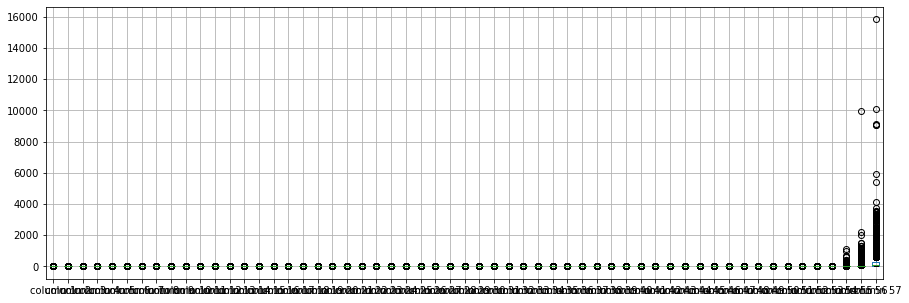

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.104284
column 2       0.213200
column 3       0.280433
column 4       0.065482
column 5       0.311648
column 6       0.095928
column 7       0.114432
column 8       0.105347
column 9       0.090100
column 10      0.239754
column 11      0.059876
column 12      0.541884
column 13      0.093833
column 14      0.057514
column 15      0.048394
column 16      0.249072
column 17      0.141385
column 18      0.184734
column 19      1.661710
column 20      0.085836
column 21      0.810797
column 22      0.121641
column 23      0.101251
column 24      0.094476
column 25      0.549958
column 26      0.265583
column 27      0.769571
column 28      0.123816
column 29      0.098516
column 30      0.102364
column 31      0.064326
column 32      0.046725
column 33      0.097411
column 34      0.047344
column 35      0.105503
column 36      0.097247
column 37      0.136560
column 38      0.013314
column 39      0.078940
column 40      0.064504
column 41      0.043667
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.016664,0.066844,0.013362,0.024484,0.060537,0.008003,-0.003497,0.107670,0.041048,...,-0.017783,-0.029968,-0.020089,-0.033151,0.057860,0.116780,-0.008845,0.044734,0.061659,0.089474
column 2,-0.016664,1.000000,-0.033469,-0.006930,-0.023803,-0.024857,0.003838,-0.016302,-0.003786,0.032887,...,-0.015780,-0.007584,-0.049257,-0.018469,-0.014479,-0.009515,0.002096,0.002487,0.000539,-0.022547
column 3,0.066844,-0.033469,1.000000,-0.020235,0.078935,0.087841,0.036902,0.012127,0.094672,0.032381,...,-0.026362,-0.032547,-0.015714,-0.034732,0.106801,0.087858,-0.002958,0.098145,0.105699,0.070514
column 4,0.013362,-0.006930,-0.020235,1.000000,0.007180,-0.010019,0.019759,0.010262,-0.000345,-0.004973,...,-0.001942,-0.000510,-0.012372,-0.007138,-0.003145,0.011017,0.000438,0.005214,0.022758,0.021515
column 5,0.024484,-0.023803,0.078935,0.007180,1.000000,0.055241,0.149991,0.030047,0.021880,0.035165,...,-0.032194,-0.031913,-0.046995,-0.025363,0.025544,0.043317,0.002508,0.054334,0.052271,0.005357
column 6,0.060537,-0.024857,0.087841,-0.010019,0.055241,1.000000,0.062892,0.079542,0.119446,0.015071,...,-0.031659,-0.018465,-0.007856,-0.014873,0.063840,0.106363,0.020246,-0.010783,0.089224,0.082204
column 7,0.008003,0.003838,0.036902,0.019759,0.149991,0.062892,1.000000,0.044579,0.044504,0.056666,...,-0.031429,-0.032966,-0.051174,-0.027541,0.052751,0.068128,0.046703,0.041317,0.057574,-0.008625
column 8,-0.003497,-0.016302,0.012127,0.010262,0.030047,0.079542,0.044579,1.000000,0.102092,0.083142,...,-0.021212,-0.027207,-0.032607,-0.019481,0.031552,0.054116,-0.007355,0.011360,0.036042,0.039908
column 9,0.107670,-0.003786,0.094672,-0.000345,0.021880,0.119446,0.044504,0.102092,1.000000,0.129786,...,-0.026049,-0.013990,-0.031214,0.013829,0.043967,0.149950,-0.000368,0.107756,0.186270,0.247393
column 10,0.041048,0.032887,0.032381,-0.004973,0.035165,0.015071,0.056666,0.083142,0.129786,1.000000,...,-0.016826,0.011533,0.002573,0.007285,0.037275,0.076131,0.044664,0.073676,0.102430,0.085779


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+78,17+78+78,17+78+78+78,17+78+78,17+78,17], vae_layer = False, seed = 780)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 680.210209012447
Epoch: 1 , loss: 676.6817676929646
Epoch: 2 , loss: 678.6602751303218
Epoch: 3 , loss: 672.6868691527469
Epoch: 4 , loss: 668.6422877295092
Epoch: 5 , loss: 675.2065957099303
Epoch: 6 , loss: 671.1927483322728
Epoch: 7 , loss: 667.7026759556362
Epoch: 8 , loss: 674.5480264271594
Epoch: 9 , loss: 664.5244930679374
Epoch: 10 , loss: 600.9524945514958
Epoch: 11 , loss: 532.9401026602822
Epoch: 12 , loss: 519.7574400154141
Epoch: 13 , loss: 507.8487924715368
Epoch: 14 , loss: 490.70745458835506
Epoch: 15 , loss: 474.01142080486443
Epoch: 16 , loss: 462.1946798716688
Epoch: 17 , loss: 453.7550939898873
Epoch: 18 , loss: 450.6914509098704
Epoch: 19 , loss: 443.27911961784764
Epoch: 20 , loss: 453.54280366797894
Epoch: 21 , loss: 440.62349894985505
Epoch: 22 , loss: 454.3507510461043
Epoch: 23 , loss: 455.5095223350392
Epoch: 24 , loss: 443.82697753374583
Epoch: 25 , loss: 447.64955258784806


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

4300.182954813006

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.0906090379785063

In [19]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [21]:
imputations[-1].to_excel("Spam_AN_1(imp).xlsx", index=False, header=False)